In [14]:
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# pip install ../

# Example for (3D) Bispectra
We show here how to compute matter-matter-galaxy, and matter-galaxy-galaxy bispectra with the halo model

## Defining the model
See `exampleHalomodelIngredients.ipynb` for details

In [16]:
# Cosmology
cosmo = {
    'Om_c': 0.28,
    'Om_b': 0.05,
    'h': 0.67,
    'sigma_8': 0.8,
    'n_s': 0.96
}

# Halo mass function
hmf=ccl.halos.MassFuncSheth99()

# Halo bias
hbf=ccl.halos.HaloBiasSheth01()

# Concentration mass Relation
cmfunc=ccl.halos.ConcentrationDuffy08()


# HOD
# HOD parameters
alpha=1
sigma=0.2
Mth=1e12
Mprime=20*Mth
beta=1

# Correlation between galaxy populations
A=0 # 0 ==> No correlation between populations
epsilon=0

# Scaling of halo profile concentration
flens=1 # 1 ==> Same as dark matter

# Get HOD
hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

# Define model
model = g3lhalo.halomodel(verbose=True, cosmo=cosmo, hmfunc=hmf, hbfunc=hbf, cmfunc=cmfunc)
model.set_hods(hod_cen, hod_sat, A=A, epsilon=epsilon, flens1=flens, flens2=flens)

Setting cosmology
Om_c: 0.28
Om_b: 0.05
h: 0.67
sigma_8: 0.8
n_s: 0.96
Also setting linear matter power spectrum
Setting halo mass function
<pyccl.halos.hmfunc.sheth99.MassFuncSheth99>
	mass_def = MassDef(Delta=fof, rho_type=matter)
Setting halo bias function
<pyccl.halos.hbias.sheth01.HaloBiasSheth01>
	mass_def = MassDef(Delta=fof, rho_type=matter)
Setting concentration mass relation
<pyccl.halos.concentration.duffy08.ConcentrationDuffy08>
	mass_def = MassDef(Delta=200, rho_type=critical)
	mass_def_strict = True


## Calculate Power spectrum
We first calculate the matter-matter, matter-galaxy, and galaxy-galaxy power spectra. This is not strictly necessary for getting the bispectra. But, later we want to plot the reduced bispectra, so this becomes necessary. The non-linear power spectra always give the 1- and 2-halo term seperate, as well as their sum. The parameters `type1` and `type2` specify which lenses (population 1 or 2) shall be correlated.

In [17]:
ks = np.geomspace(1e-2, 10)
z=0

# Linear matter power spectrum
Pk_lin = model.pk_lin(ks, z)

# Matter-Matter power spectrum
Pk_ss_1h, Pk_ss_2h, Pk_ss = model.source_source_ps(ks, z)


# Matter-Galaxy power spectrum
Pk_sl_1h, Pk_sl_2h, Pk_sl = model.source_lens_ps(ks, z, type=1)


# Galaxy-Galaxy power spectrum
Pk_ll_1h, Pk_ll_2h, Pk_ll = model.lens_lens_ps(ks, z, type1=1, type2=1)

# Matter-Galaxy-Galaxy bispectrum
Now we calculate the matter-galaxy-galaxy bispectrum

In [18]:
# Matter-Galaxy-Galaxy

B1h_sll=[]
B2h_sll=[]
B3h_sll=[]
B_sll=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_lens_lens_bs(k, k, k, z,  type1=1, type2=1)
    B1h_sll.append(B1h)
    B2h_sll.append(B2h)
    B3h_sll.append(B3h)
    B_sll.append(B)

B1h_sll=np.array(B1h_sll)
B2h_sll=np.array(B2h_sll)
B3h_sll=np.array(B3h_sll)
B_sll=np.array(B_sll)


In [19]:
# Get Reduced bispectrum

Q1h_sll=B1h_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)
Q2h_sll=B2h_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)
Q3h_sll=B3h_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)
Q_sll=B_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)

Text(0, 0.5, 'Matter-Galaxy-Galaxy $Q(k,k,k)$')

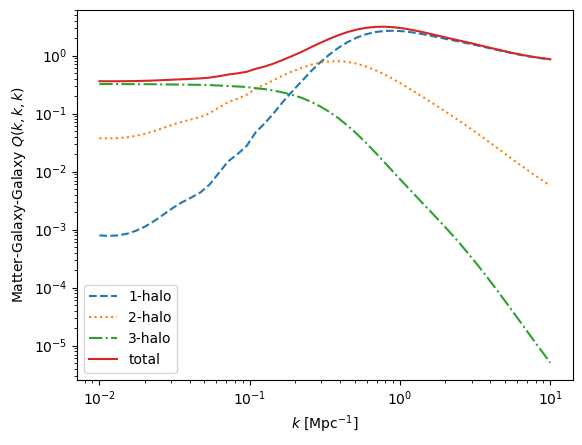

In [20]:
# Plot

plt.loglog(ks, Q1h_sll, label='1-halo', ls='--')
plt.loglog(ks, Q2h_sll, label='2-halo', ls=':')
plt.loglog(ks, Q3h_sll, label='3-halo', ls='-.')
plt.loglog(ks, Q_sll, label='total')
plt.legend()

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'Matter-Galaxy-Galaxy $Q(k,k,k)$')


# Matter-Matter-Galaxy bispectrum
Now we calculate the matter-matter-galaxy bispectrum

In [21]:
# Matter-Matter-Galaxy

B1h_ssl=[]
B2h_ssl=[]
B3h_ssl=[]
B_ssl=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_source_lens_bs(k, k, k, z,  type=1)
    B1h_ssl.append(B1h)
    B2h_ssl.append(B2h)
    B3h_ssl.append(B3h)
    B_ssl.append(B)

B1h_ssl=np.array(B1h_ssl)
B2h_ssl=np.array(B2h_ssl)
B3h_ssl=np.array(B3h_ssl)
B_ssl=np.array(B_ssl)


In [22]:
# Get Reduced bispectrum

Q1h_ssl=B1h_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)
Q2h_ssl=B2h_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)
Q3h_ssl=B3h_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)
Q_ssl=B_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)

Text(0, 0.5, 'Matter-Matter-Galaxy $Q(k,k,k)$')

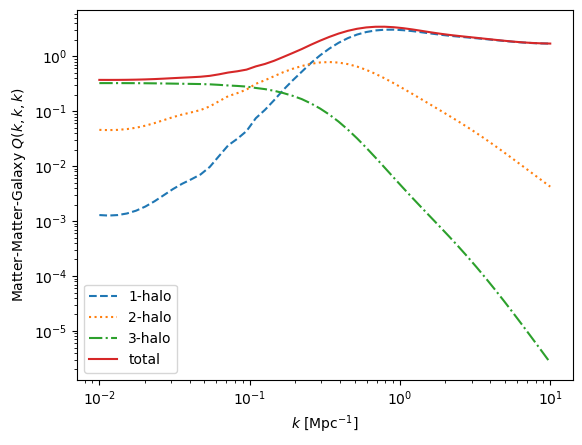

In [23]:
# Plot

plt.loglog(ks, Q1h_ssl, label='1-halo', ls='--')
plt.loglog(ks, Q2h_ssl, label='2-halo', ls=':')
plt.loglog(ks, Q3h_ssl, label='3-halo', ls='-.')
plt.loglog(ks, Q_ssl, label='total')
plt.legend()

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'Matter-Matter-Galaxy $Q(k,k,k)$')


# Mattter-Matter-Matter bispectrum

In [24]:
# Matter-Matter-Matter

B1h_sss=[]
B2h_sss=[]
B3h_sss=[]
B_sss=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_source_source_bs(k, k, k, z)
    B1h_sss.append(B1h)
    B2h_sss.append(B2h)
    B3h_sss.append(B3h)
    B_sss.append(B)

B1h_sss=np.array(B1h_sss)
B2h_sss=np.array(B2h_sss)
B3h_sss=np.array(B3h_sss)
B_sss=np.array(B_sss)


In [25]:
# Get Reduced bispectrum

Q1h_sss=B1h_sss/(3*Pk_ss**2)
Q2h_sss=B2h_sss/(3*Pk_ss**2)
Q3h_sss=B3h_sss/(3*Pk_ss**2)
Q_sss=B_sss/(3*Pk_ss**2)

Text(0, 0.5, 'Matter-Matter-Matter $Q(k,k,k)$')

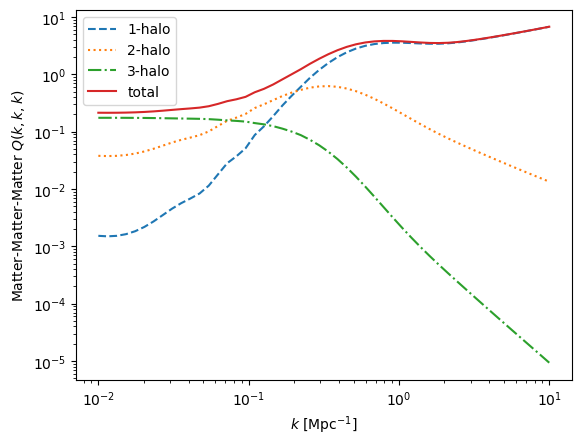

In [26]:
# Plot

plt.loglog(ks, Q1h_sss, label='1-halo', ls='--')
plt.loglog(ks, Q2h_sss, label='2-halo', ls=':')
plt.loglog(ks, Q3h_sss, label='3-halo', ls='-.')
plt.loglog(ks, Q_sss, label='total')
plt.legend()

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'Matter-Matter-Matter $Q(k,k,k)$')
